# IAIA Juegos
---
---
## Para la Implementación
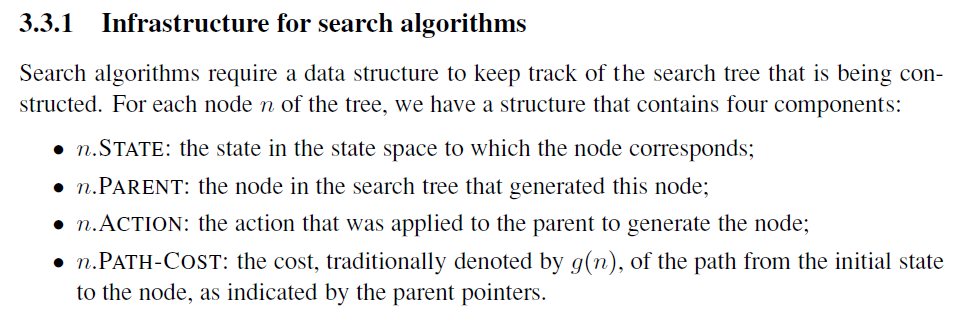
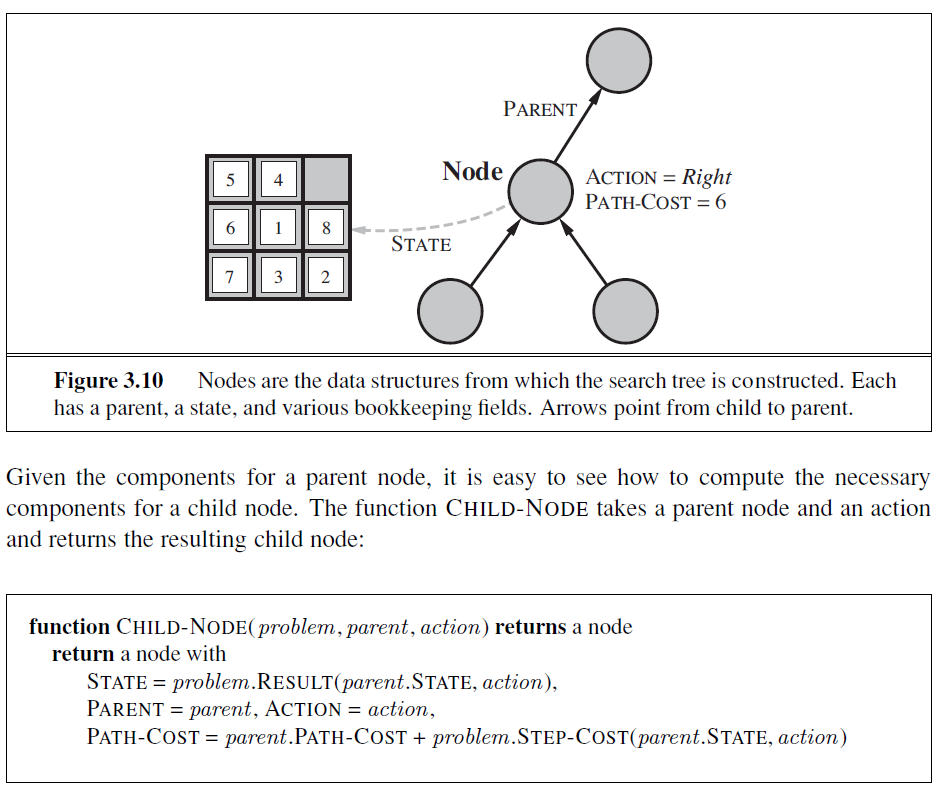

In [1]:
#Codigo implementación en árbol

---
---
## Modelado
### Sin Adversarios
#### Canibales y Misioneros
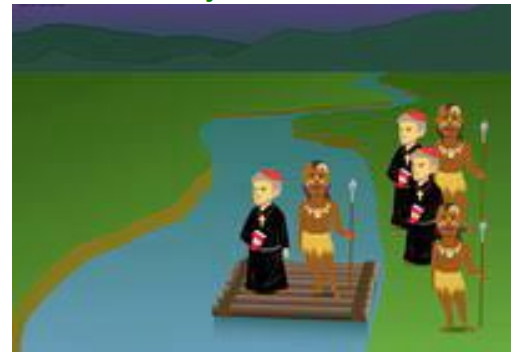

In [2]:
class EstadoCyM:
    barco = True
    canibales = 3
    misioneros = 3
    
    def print_barco(self):
        print(self.barco)
         
    def print_canibales(self):
        print(self.canibales)
        
    def print_misioneros(self):
        print(str(self.misioneros))
    
    def __str__(self):
        impresion = "Al lado derecho del río tenemos:" + "\nBarco: " + str(self.barco) + "\nCanibales: " + str(self.canibales) + "\nMisioneros: " + str(self.misioneros)
        return impresion

CyMEstadoInicial = EstadoCyM()
    
def inicialCyM():
    return CyMEstadoInicial

def esFinalCyM(estado):
    esFinal = estado.barco == False and estado.canibales == 0 and estado.misioneros == 0
    return esFinal 

def printEstadoCyM(estado):
    print(estado)

In [3]:
printEstadoCyM(inicialCyM())

Al lado derecho del río tenemos:
Barco: True
Canibales: 3
Misioneros: 3


In [4]:
inicialCyM().print_barco()

True


In [5]:
inicialCyM().print_canibales()

3


In [6]:
inicialCyM().print_misioneros()

3


In [7]:
esFinalCyM(inicialCyM())

False

### Con Adversarios
#### Triqui


In [8]:
class Jugador:
    simbolo = ""
    jugado = False
    
    def __init__(self, simbolo):
        self.simbolo = simbolo
    
    def print_simbolo(self):
        print(self.simbolo)
        
    def print_jugado(self):
        print(self.jugado)
    
    def __str__(self):
        return self.simbolo

jugador1 = Jugador("x")
jugador2 = Jugador("o")



class Estado:
    tablero = ""
    jugador = None
    estado = [tablero, jugador]
    
    def print_tablero(self):
        print(self.tablero)
         
    def print_jugador(self):
        print(self.jugador)
        
    def print_estado(self):
        print(str(self.tablero))
    
    def __str__(self):
        impresion = "[" + str(self.tablero) + ", [" + str(self.jugador) + "]]"
        return impresion

    
TEstadoInicial = Estado()
TEstadoInicial.tablero = [["-", "-", "-"], ["-", "-", "-"], ["-", "-", "-"]]
TEstadoInicial.jugador = jugador1


def inicialT():
    return TEstadoInicial

def esFinalT(estado):
    esFinal = checkWinHorizontal(estado) | checkWinVertical(estado) | checkWinDiagonales(estado)
    return esFinal 

def printJugadorT(jugador):
    print(jugador)
    
def printEstadoT(estado):
    print(estado)    
    
def jugadorT(estado):
    return estado.jugador

def oponenteT(jugador):
    if jugador.simbolo == "x":
        return jugador2
    else:
        return jugador1

In [9]:
printJugadorT(jugador1)

x


In [10]:
printJugadorT(jugador2)

o


In [11]:
printEstadoT(inicialT())

[[['-', '-', '-'], ['-', '-', '-'], ['-', '-', '-']], [x]]


In [13]:
printJugadorT(jugadorT(inicialT()))

x


In [14]:
printJugadorT(oponenteT(jugadorT(inicialT())))

o


#### Parte de la Implementación
Sin límite de profundidad

In [24]:
def TMinMaxDecision(estado):
    maxVal = -Math.inf
    nodoR = null
    for s in sucesoresT(estado):
        aComparar = minValue(s)
        if (aComparar > maxVal):
            maxVal = aComparar
            nodoR = s
    return nodoR


def minValue(estado):
    minR = Math.inf
    if (esFinalT(estado)):
        minR = utilidadT(estado, oponenteT(jugadorT(estado)))
    else:
        for s in sucesoresT(estado):
            aComparar = maxValue(s)
            if (aComparar < minR):
                minR = aComparar
    return minR


def maxValue(estado):
    maxR = -Math.inf
    if (esFinalT(estado)):
        maxR = utilidadT(estado, jugadorT(estado))
    else:
        for s in sucesoresT(estado):
            aComparar = minValue(s)
            if (aComparar > maxR):
                maxR = aComparar
    return maxR

Con límite de profundidad

In [ ]:
def TMinMaxDecisionP(estado, p):
    maxVal = -Math.inf
    nodoR = null
    for s in sucesoresT(estado):
        aComparar = minValue(s, p-1)
        if (aComparar > maxVal):
            maxVal = aComparar
            nodoR = s
    return nodoR


def minValueP(estado, p):
    minR = Math.inf
    if (esFinalT(estado) or p==0):
        minR = utilidadT(estado, oponenteT(jugadorT(estado)))
    else:
        for s in sucesoresT(estado):
            aComparar = maxValue(s, p-1)
            if (aComparar < minR):
                minR = aComparar
    return minR


def maxValueP(estado, p):
    maxR = -Math.inf
    if (esFinalT(estado) or p==0):
        maxR = utilidadT(estado, jugadorT(estado))
    else:
        for s in sucesoresT(estado):
            aComparar = minValue(s, p-1)
            if (aComparar > maxR):
                maxR = aComparar
    return maxR

---
#### 